<h3> Funkcje aktywacji

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-10,10,100) #100 liczb z zakresu -10 : 10

In [3]:
y1 = 1/(1+np.exp(-x))
y2 = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
y3 = np.array([max(elem,0) for elem in x])
y4 = np.exp(-x**2/2)

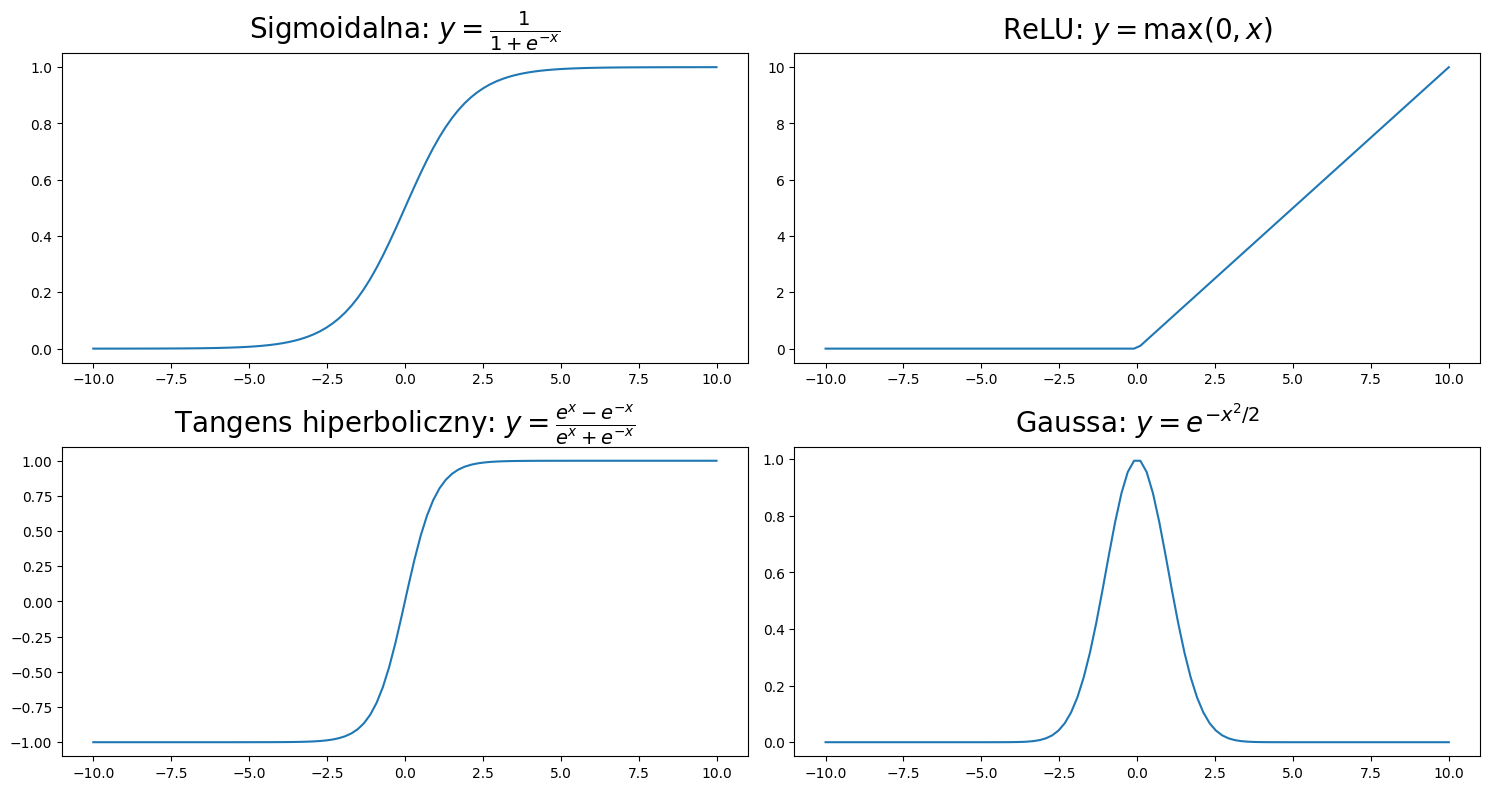

In [4]:
fig, axs = plt.subplots(2, 2,figsize=(15,8))
axs[0, 0].plot(x, y1)
axs[0, 0].set_title('Sigmoidalna: ' + r'$y=\frac{1}{1+e^{-x}}$',fontsize = 20, y=1.02)
axs[1, 0].plot(x, y2)
axs[1, 0].set_title('Tangens hiperboliczny: ' + r'$y=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$',fontsize = 20, y=1.02)
axs[0, 1].plot(x, y3)
axs[0, 1].set_title('ReLU: ' + r'$y=\max(0,x)$',fontsize = 20, y=1.02)
axs[1, 1].plot(x, y4)
axs[1, 1].set_title('Gaussa: ' + r'$y=e^{-x^2/2}$',fontsize = 20, y=1.02)
fig.tight_layout()

Softmax. Często używana jako wyjściowa funkcja przy zagadnieniu klasyfikacji. Dla wektora wejściowego $z=[z1,z2,z3,...]$ wyznaczane są wartości:

$\sigma (z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}$

które sumują się do 1 i interpretowane mogą być jako wartości prawdopodobieństwa.


<h3> Sieci neuronowe: Regresja liniowa


In [5]:
import torch
import torch.nn as nn

In [6]:
X = torch.tensor([[1.], [2], [3], [4]])   
y = torch.tensor([[7.], [9], [11], [13]]) #czyli Y = a*X + b,  gdzie a=2, b=5

n_samples, n_features = X.shape  #n_samples - ile obserwacji (tutaj 4), n_features - ile zmiennych (tutaj 1)


input_size = 1 #n_features                 
output_size = 1 #przeiwdywany Y ma byc liczbą
model = nn.Linear(input_size, output_size) #zakladam liniową postac modelu

learning_rate = 0.01

loss_function = nn.MSELoss() #Funkcja kosztu 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

n_iters= 1000

for epoch in range(n_iters):
    #Krok Forward: Obliczenie przewidywanych wartosci Y oraz funkcji kosztu
    y_predicted = model(X)
    loss = loss_function(y_predicted, y)

    #Zerujemy gradient przed kolejnym przejściem
    optimizer.zero_grad()
    
    #Krok Backward: Obliczenie gradientu z funkcji kosztu i aktualizacja parametrów modelu
    loss.backward()
    optimizer.step()



    if (epoch) % 200 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 1, loss = 94.1762
epoch: 201, loss = 1.0318
epoch: 401, loss = 0.3110
epoch: 601, loss = 0.0937
epoch: 801, loss = 0.0282


In [7]:
print(model)

Linear(in_features=1, out_features=1, bias=True)


In [8]:
list(model.parameters()) #parametry modelu

[Parameter containing:
 tensor([[2.0768]], requires_grad=True),
 Parameter containing:
 tensor([4.7742], requires_grad=True)]

In [9]:
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


<h4> Model jako klasa

In [10]:
#To samo co wyżej, tyle że sam model jest w formie klasy

X = torch.tensor([[1.], [2], [3], [4]])
y = torch.tensor([[7.], [9], [11], [13]]) #czyli Y = a*X + b,  gdzie a=2, X=5

n_samples, n_features = X.shape  #n_samples - ile obserwacji (tutaj 4), n_features - ile zmiennych (tutaj 1)


input_size = 1 #n_features
output_size = 1 #przeiwdywany Y ma byc liczbą


class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

learning_rate = 0.01

loss_function = nn.MSELoss() #Funkcja kosztu 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

n_iters= 1000

for epoch in range(n_iters):
    #Krok Forward: Obliczenie przewidywanych wartosci Y oraz funkcji kosztu
    y_predicted = model(X)
    loss = loss_function(y_predicted, y)
    
    #Zerujemy gradient przed kolejnym przejściem
    optimizer.zero_grad()
    
    #Krok Backward: Obliczenie gradientu z funkcji kosztu i aktualizacja parametrów modeli
    loss.backward()
    optimizer.step()

    if (epoch) % 200 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 1, loss = 102.7958
epoch: 201, loss = 1.0476
epoch: 401, loss = 0.3157
epoch: 601, loss = 0.0952
epoch: 801, loss = 0.0287


<h3> Sieci neuronowe: Regresja logistyczna (dwie klasy)

In [11]:
X = torch.tensor([[1.,1], [1,-1], [-2,1], [-3,-1]])
y = torch.tensor([[0.], [0], [1], [1]]) #float

n_samples, n_features = X.shape  #n_samples - ile obserwacji (tutaj 4), n_features - ile zmiennych (tutaj 1)


class Model(nn.Module):
    def __init__(self, n_input_features):
        super().__init__()
        self.linear = nn.Linear(n_input_features, 1) #tu: y=wx+b

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x)) #liniowo a potem licze 1/(1+e^(-y))
        return y_pred

model = Model(n_features)

#Parametry + funkcja kosztu + optymalizator
num_epochs = 1000
learning_rate = 0.01
loss_function = nn.BCELoss() #binary cross-entropy 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Trenowanie
for epoch in range(num_epochs):
    #Forward
    y_pred = model(X)
    loss = loss_function(y_pred, y)

    #Zerowanie grdientu przed kolejnym przejsciem
    optimizer.zero_grad()
    
    #Backward
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 100, loss = 0.4468
epoch: 200, loss = 0.2854
epoch: 300, loss = 0.2046
epoch: 400, loss = 0.1571
epoch: 500, loss = 0.1263
epoch: 600, loss = 0.1051
epoch: 700, loss = 0.0896
epoch: 800, loss = 0.0780
epoch: 900, loss = 0.0689
epoch: 1000, loss = 0.0617


In [12]:
with torch.no_grad():
    y_predicted = model(X) #tutaj są liczby z przedzialu (0,1)
    y_predicted_cls = y_predicted.round() #zaokrągla je do 0 lub 1 [kategorii]
    print(y_predicted_cls)
    acc = y_predicted_cls.eq(y).sum() / float(y.shape[0]) #ile sie zgadza
    print(f'accuracy: {acc.item():.4f}')

tensor([[0.],
        [0.],
        [1.],
        [1.]])
accuracy: 1.0000


<h3> Sieci neuronowe: Regresja logistyczna (więcej niż dwie klasy)

In [13]:
import torch
import torch.nn as nn

X = torch.tensor([[1.,1], [1,-1], [-2,1], [-3,-1],[2,2]])
y = torch.tensor([0, 0, 1, 2, 2])  # etykiety klas - long, 1D

n_samples, n_features = X.shape
n_classes = 3  

class Model(nn.Module):
    def __init__(self, n_input_features):
        super().__init__()
        self.linear = nn.Linear(n_input_features, n_classes)

    def forward(self, x):
        return self.linear(x)  #niepotrzebny Softmax bo potem cross entropy

model = Model(n_features)

num_epochs = 2000
learning_rate = 0.01
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


#Trenowanie
for epoch in range(num_epochs):
    #Forward
    y_pred = model(X)
    loss = loss_function(y_pred, y)

    #Zerowanie grdientu przed kolejnym przejsciem
    optimizer.zero_grad()
    
    #Backward
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        

with torch.no_grad():
    y_predicted = model(X)
    y_predicted_cls = y_predicted.argmax(1)  # wybieramy klase
    print(y_predicted_cls)
    acc = y_predicted_cls.eq(y).sum() / float(y.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 100, loss = 1.0456
epoch: 200, loss = 0.8643
epoch: 300, loss = 0.7846
epoch: 400, loss = 0.7352
epoch: 500, loss = 0.6999
epoch: 600, loss = 0.6723
epoch: 700, loss = 0.6494
epoch: 800, loss = 0.6295
epoch: 900, loss = 0.6120
epoch: 1000, loss = 0.5962
epoch: 1100, loss = 0.5819
epoch: 1200, loss = 0.5687
epoch: 1300, loss = 0.5565
epoch: 1400, loss = 0.5451
epoch: 1500, loss = 0.5346
epoch: 1600, loss = 0.5246
epoch: 1700, loss = 0.5153
epoch: 1800, loss = 0.5065
epoch: 1900, loss = 0.4982
epoch: 2000, loss = 0.4904
tensor([2, 0, 1, 2, 2])
accuracy: 0.8000


<h3> Sieci neuronowe: klasyfikacja wieloklasowa

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F


X = torch.tensor([[1.,1], [1,-1], [-2,1], [-3,-1],[2,2]])
y = torch.tensor([0, 0, 1, 2, 2])  # etykiety klas - long, 1D

n_samples, n_features = X.shape
n_classes = 3  

class Model(nn.Module):
    def __init__(self, n_input_features, h1, h2):
        super().__init__()
        self.linear1 = nn.Linear(n_input_features, h1)
        self.linear2 = nn.Linear(h1, h2)
        self.linear3 = nn.Linear(h2, n_classes)

    def forward(self, x):
        l1 = self.linear1(x)
        o1 = F.relu(l1)
        l2 = self.linear2(o1)
        o2 = F.relu(l2)
        l3 = self.linear3(o2)
        return l3  #niepotrzebny Softmax bo potem cross entropy

    
h1 = 4
h2 = 2
model = Model(n_features, h1, h2)

num_epochs = 2000
learning_rate = 0.01
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


#Trenowanie
for epoch in range(num_epochs):
    #Forward
    y_pred = model(X)
    loss = loss_function(y_pred, y)

    #Zerowanie grdientu przed kolejnym przejsciem
    optimizer.zero_grad()
    
    #Backward
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        

with torch.no_grad():
    y_predicted = model(X)
    y_predicted_cls = y_predicted.argmax(1)  # wybieramy klase
    print(y_predicted_cls)
    acc = y_predicted_cls.eq(y).sum() / float(y.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 100, loss = 1.0416
epoch: 200, loss = 0.9924
epoch: 300, loss = 0.9210
epoch: 400, loss = 0.8553
epoch: 500, loss = 0.7933
epoch: 600, loss = 0.7375
epoch: 700, loss = 0.6894
epoch: 800, loss = 0.6507
epoch: 900, loss = 0.6173
epoch: 1000, loss = 0.5873
epoch: 1100, loss = 0.5605
epoch: 1200, loss = 0.5367
epoch: 1300, loss = 0.5155
epoch: 1400, loss = 0.4971
epoch: 1500, loss = 0.4814
epoch: 1600, loss = 0.4680
epoch: 1700, loss = 0.4570
epoch: 1800, loss = 0.4477
epoch: 1900, loss = 0.4401
epoch: 2000, loss = 0.4338
tensor([0, 0, 1, 2, 0])
accuracy: 0.8000


http://snap.stanford.edu/data/web-FineFoods.html

<h4> Zadanie1: Pobierz część danych Amazon Fine Foods review (z github). Zbuduj model regresji logistycznej wieloklasowej na podstawie reprezentacji BoW, SoW lub TF-IDF.
    
    
- podziel dane na zbiór treningowy i testowy (8:2)
- naucz model na zbiorze treningowym
- wyznacz dokładność na zbiorze treningowym i testowym po etapie uczenia; powinieneś otrzymać min. 60% na zbiorze zbiorze testowym.
    
Potestuj różne topolgie sieci/funkcje aktywacji/wymiary.

W przypadku metody TF-IDF

tfidf = TfidfVectorizer(max_features = ??)

X_train_tfidf = tfidf.fit_transform(X_train)

X_test_tfidf = tfidf.transform(X_test)

<h3> N-gramy + Sieci neuronowe

In [35]:
test_sentence = ['tomorrow', 'and', 'tomorrow', 'and', 'tomorrow', 'creeps', 'in', 'this', 'petty', 'pace', 'from', 'day', 'to', 'day', 'to', 'the', 'last', 'syllable', 'of', 'recorded', 'time', 'and', 'all', 'our', 'yesterdays', 'have', 'lighted', 'fools', 'the', 'way', 'to', 'dusty', 'death', 'out', 'out', 'brief', 'candle', "life's", 'but', 'a', 'walking', 'shadow,', 'a', 'poor', 'player', 'that', 'the','way', 'to','struts', 'and', 'frets', 'his', 'hour', 'upon', 'the', 'stage', 'and', 'then', 'is', 'heard', 'no', 'more', 'it', 'is', 'a', 'tale', 'told', 'by', 'an', 'idiot', 'full', 'of', 'sound', 'and', 'fury', 'signifying', 'nothing']
print(test_sentence)

['tomorrow', 'and', 'tomorrow', 'and', 'tomorrow', 'creeps', 'in', 'this', 'petty', 'pace', 'from', 'day', 'to', 'day', 'to', 'the', 'last', 'syllable', 'of', 'recorded', 'time', 'and', 'all', 'our', 'yesterdays', 'have', 'lighted', 'fools', 'the', 'way', 'to', 'dusty', 'death', 'out', 'out', 'brief', 'candle', "life's", 'but', 'a', 'walking', 'shadow,', 'a', 'poor', 'player', 'that', 'the', 'way', 'to', 'struts', 'and', 'frets', 'his', 'hour', 'upon', 'the', 'stage', 'and', 'then', 'is', 'heard', 'no', 'more', 'it', 'is', 'a', 'tale', 'told', 'by', 'an', 'idiot', 'full', 'of', 'sound', 'and', 'fury', 'signifying', 'nothing']


In [36]:
vocab = list(set(test_sentence)) #lista slow unikalnych

In [37]:
print(vocab)

['fury', 'all', 'to', 'petty', 'lighted', 'time', 'yesterdays', 'have', 'poor', 'death', 'full', 'and', 'hour', 'is', 'it', 'no', 'from', 'recorded', 'of', 'out', 'sound', 'shadow,', 'player', 'his', 'our', 'struts', 'heard', 'the', 'that', 'day', "life's", 'then', 'tale', 'walking', 'signifying', 'creeps', 'pace', 'syllable', 'but', 'told', 'frets', 'fools', 'way', 'a', 'stage', 'in', 'tomorrow', 'this', 'candle', 'upon', 'an', 'nothing', 'brief', 'last', 'more', 'idiot', 'by', 'dusty']


In [38]:
print(len(vocab))

58


In [39]:
word_to_ix = {word: i for i, word in enumerate(vocab)} #kazdemu slowu przyporządkowuje unikalny numer

In [40]:
print(word_to_ix)

{'fury': 0, 'all': 1, 'to': 2, 'petty': 3, 'lighted': 4, 'time': 5, 'yesterdays': 6, 'have': 7, 'poor': 8, 'death': 9, 'full': 10, 'and': 11, 'hour': 12, 'is': 13, 'it': 14, 'no': 15, 'from': 16, 'recorded': 17, 'of': 18, 'out': 19, 'sound': 20, 'shadow,': 21, 'player': 22, 'his': 23, 'our': 24, 'struts': 25, 'heard': 26, 'the': 27, 'that': 28, 'day': 29, "life's": 30, 'then': 31, 'tale': 32, 'walking': 33, 'signifying': 34, 'creeps': 35, 'pace': 36, 'syllable': 37, 'but': 38, 'told': 39, 'frets': 40, 'fools': 41, 'way': 42, 'a': 43, 'stage': 44, 'in': 45, 'tomorrow': 46, 'this': 47, 'candle': 48, 'upon': 49, 'an': 50, 'nothing': 51, 'brief': 52, 'last': 53, 'more': 54, 'idiot': 55, 'by': 56, 'dusty': 57}


In [41]:
from nltk import ngrams

In [42]:
N3_GM = list(ngrams(test_sentence,3)) #3-gramy

In [43]:
print(N3_GM[:3])

[('tomorrow', 'and', 'tomorrow'), ('and', 'tomorrow', 'and'), ('tomorrow', 'and', 'tomorrow')]


In [44]:
N3_GM = [([x,y],z) for x,y,z in N3_GM] #to samo co wyzej, ale nieco w innym w formacie
print(N3_GM[:3])

[(['tomorrow', 'and'], 'tomorrow'), (['and', 'tomorrow'], 'and'), (['tomorrow', 'and'], 'tomorrow')]


In [45]:
import torch.optim as optim
import torch.nn.functional as F

#Model
class NGramModel(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)  #slowa na embeddingi
        self.linear1 = nn.Linear(context_size*embedding_dim, HD) #pierwsze przeksztalcenie liniowe
        self.linear2 = nn.Linear(HD, vocab_size)  #drugie przeksztalcenie liniowe

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1)) #embeddingi
        out = F.relu(self.linear1(embeds))  #dzialam funkcją aktywacji ReLu na wynik po pierwszym przeksztalceniu liniowym
        out = self.linear2(out)             #przeksztalcam liniowo poprzednie wartosci
        log_probs = F.log_softmax(out, dim=1) #na koniec wyznaczam logarytmy prawdopodobienstw
        return log_probs

In [46]:
#Dane do modelu

CS = 2 #ile slow uzywam do predykcji
ED = 4 #rozmiar osadzonego wektora (embedding vector)
HD = 3 #rozmiar warstwy ukrytej

* aktualizacja parametrów po każdym przykładzie

In [47]:
learning_rate = 0.001
loss_function = nn.NLLLoss()  #funkcja kosztu
model = NGramModel(len(vocab), ED, CS) 
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


#Postać modelu
print(model.eval()) 

#Trenowanie modelu

for epoch in range(3000):
    for context, target in N3_GM:
        
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)  #dane
        log_probs = model(context_idxs)                                                  #co daje model
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long)) #funkcja kosztu, oczekuje ze targety są typu Long
        
        #zerowanie gradientu
        optimizer.zero_grad()        
        
        #liczenie pochodnych i aktualizacja parametrow
        loss.backward()
        optimizer.step()  
        
    if (epoch+1) % 300 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}') 

NGramModel(
  (embeddings): Embedding(58, 4)
  (linear1): Linear(in_features=8, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=58, bias=True)
)
epoch: 300, loss = 4.5815
epoch: 600, loss = 4.4694
epoch: 900, loss = 4.3656
epoch: 1200, loss = 3.9162
epoch: 1500, loss = 3.2460
epoch: 1800, loss = 2.6340
epoch: 2100, loss = 2.4764
epoch: 2400, loss = 2.4093
epoch: 2700, loss = 2.3621
epoch: 3000, loss = 2.3247


In [48]:
#Przewidywanie wg modelu

with torch.no_grad():
    context = ['tomorrow', 'and']  #bede przewidywal kolejne slowo na podstawe tych dwoch
    context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long) #zapisuje w odpowiednim formacie te dane
    print(context_idxs) #tak wygladają te dane  [ich indeksy]
    pred = model(context_idxs) #co pokazuje model?
    print(pred)                #co przewiduje model?
    index_of_prediction = np.argmax(pred)  #wyznaczam ten indeks gdzie jest największa wartosc
    print(vocab[index_of_prediction])         #jakie slowo sie tam kryje

tensor([46, 11])
tensor([[-45.0100,  -2.9830, -44.5341, -42.7464,  -2.0736, -41.8945, -44.1526,
         -18.3252, -32.6580, -37.6867, -44.1041, -45.9456,  -1.9303,  -7.6093,
         -66.9062,  -9.1092,  -2.7192, -10.2077, -41.0600,  -2.7756, -36.6790,
         -33.8081, -18.8566, -21.0328, -35.2623, -41.0794, -50.7519, -61.9938,
          -6.6131, -18.3979, -38.1406,  -5.1238, -30.3844, -39.7867, -36.7160,
         -48.9817, -21.2896, -40.5127, -41.2218, -16.9520, -10.0804, -40.1795,
         -37.1089, -58.9737, -32.3520, -45.6798,  -0.6375, -41.7257,  -4.5929,
         -41.0097, -39.8358, -41.7510, -20.0787, -36.1252,  -6.3254,  -6.3423,
         -36.8821, -44.0328]])
tomorrow


* aktualizacja parametrów po przejściu całych danych

In [49]:
learning_rate = 0.001
loss_function = nn.NLLLoss()  #funkcja kosztu

model = NGramModel(len(vocab), ED, CS) 
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(3000):
    total_loss = 0  # sumujemy wszystkie straty w epoce
    
    for context, target in N3_GM:
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        log_probs = model(context_idxs)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))
        
        total_loss += loss  # akumulujemy stratę, bez backward tutaj
        
    optimizer.zero_grad()   # zerujemy gradienty przed backwardem
    total_loss.backward()   # liczymy gradienty po całym batchu
    optimizer.step()        # aktualizacja parametrów

    if (epoch+1) % 300 == 0:
        print(f'epoch: {epoch+1}, loss = {total_loss.item():.4f}')

epoch: 300, loss = 288.4884
epoch: 600, loss = 250.4160
epoch: 900, loss = 219.9804
epoch: 1200, loss = 198.1385
epoch: 1500, loss = 180.3834
epoch: 1800, loss = 167.6518
epoch: 2100, loss = 155.1729
epoch: 2400, loss = 145.4557
epoch: 2700, loss = 136.0244
epoch: 3000, loss = 124.4891


In [50]:
#Przewidywanie wg modelu

with torch.no_grad():
    context = ['tomorrow', 'and']  #bede przewidywal kolejne slowo na podstawe tych dwoch
    context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long) #zapisuje w odpowiednim formacie te dane
    print(context_idxs) #tak wygladają te dane  [ich indeksy]
    pred = model(context_idxs) #co pokazuje model?
    print(pred)                #co przewiduje model?
    index_of_prediction = np.argmax(pred)  #wyznaczam ten indeks gdzie jest największa wartosc
    print(vocab[index_of_prediction])         #jakie slowo sie tam kryje

tensor([46, 11])
tensor([[-13.6435,  -5.7321, -27.0121,  -4.4168, -19.9065, -58.9628,  -9.9161,
          -4.5757, -22.0944, -24.6085, -31.2479, -90.1430, -29.6877, -14.9848,
         -80.4170, -38.1473, -26.5603, -10.8141, -17.5090, -23.6322, -45.6418,
         -32.3528, -43.2570, -31.9012, -17.4820, -28.2087, -37.2730, -63.8035,
         -47.9616,  -6.8723, -27.3279, -16.5920, -26.6597, -38.2550, -35.6696,
         -54.7058, -42.2224, -54.8569, -11.0120, -12.1650,  -2.8353, -16.8843,
         -34.2597, -32.5548, -37.7719, -13.0141,  -0.1555, -23.8621,  -8.2135,
         -28.0798, -21.6865, -45.0835,  -2.8426, -32.0089, -47.6714, -32.8985,
         -24.9494, -38.4481]])
tomorrow


<h4> Zadanie2: Wybierz dowolny zestaw tekstów piosenek (co najmniej 6) i na ich podstawie zbuduj model generujący kilka kolejnych słów piosenki ( kolejne słowo, za każdym razem w oparciu o 2 (lub 3) poprzednie słowa). 
    
 <br>
 <br>

Potestuj różne rozmiary embeddingów, zmodyfikuj topologię sieci jeżeli to konieczne.
    
    
    

<h4> Zadanie3: Zbuduj model, który będzie przewidywał słowo w oparciu o kontekst - 2 wcześniejsze i 2 następne słowa. Zastosuj go do cytatów (plik quotes.txt).
  
 <br>
 <br>
    
Potestuj różne rozmiary embeddingów, zmodyfikuj topologię sieci jeżeli to konieczne.


<h3> Uzupłenienie

* W przypadku pytorch, preferowane jest zapisywanie przez torch.save (zamiast pickle). Poniżej zamieszczam przykład zapisania i otwrzenia modelu.


In [39]:
torch.save(model, 'moj_model') #zapisywanie

In [40]:
m2  = torch.load('moj_model') #otwieranie

In [41]:
list(m2.parameters())

[Parameter containing:
 tensor([[-0.2715,  0.3353,  0.6077,  0.4721,  0.5469,  0.4982, -0.4634, -0.9421,
          -0.9493, -0.0108,  0.4449,  0.3222,  0.1069,  0.4797,  0.2562, -0.0133,
          -0.2214, -0.1348, -0.1966, -0.1131, -0.1039, -0.3961, -0.3199,  0.0915,
           0.0736,  0.0075],
         [-0.0693, -0.4256, -0.4205, -0.3617, -0.6208, -0.3198,  0.4557,  0.7042,
           0.7552, -0.2813, -0.6322, -0.5549, -0.3656, -0.5789, -0.3887, -0.1766,
           0.2232,  0.1925,  0.1339,  0.2866,  0.3304,  0.3615,  0.1448, -0.1206,
           0.0646, -0.0440]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0530, -0.1060], requires_grad=True)]

* numpy <-> torch

In [92]:
x = np.array([1, 2, 3])
y = torch.from_numpy(x)
print(y)

tensor([1, 2, 3], dtype=torch.int32)


In [94]:
x = np.array([1.0, 2, 3])
y = torch.from_numpy(x)
print(y)

tensor([1., 2., 3.], dtype=torch.float64)


In [95]:
x = np.array([1.0, 2, 3])
z = torch.tensor(x, dtype=torch.long) #int64 - zwłaszcza przy indeksowaniu np. słów
print(z)

tensor([1, 2, 3])


In [97]:
x = np.array([1, 2, 3])
zz = torch.tensor(x, dtype=torch.float) #dane wejsciowe do sieci najczesciej float
print(zz)

tensor([1., 2., 3.])


In [99]:
a = torch.tensor([1, 2, 3])
b = a.detach().cpu().numpy() #odłącza gradienty i przechodzi na CPU (gdyby czasem bylo na GPU)
print(b)

[1 2 3]
